<a href="https://colab.research.google.com/github/JKH-ML/python/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
list_data = [[1, 2], [3, 4]]
tensor_data = torch.tensor(list_data)

print(tensor_data)
print(type(tensor_data))
print(tensor_data.shape)
print(tensor_data.dtype)
print(tensor_data.device)


tensor([[1, 2],
        [3, 4]])
<class 'torch.Tensor'>
torch.Size([2, 2])
torch.int64
cpu


In [ ]:
# 코랩에서는 런타임 변경 필요
if torch.cuda.is_available():
    tensor_data = tensor_data.to("cuda")

In [ ]:
np_data = np.array(list_data)
tensor_data_from_np = torch.tensor(np_data)

print(tensor_data_from_np)
print(type(tensor_data_from_np))
print(tensor_data_from_np.shape)
print(tensor_data_from_np.dtype)
print(tensor_data_from_np.device)

tensor_float = tensor_data_from_np.float()
print(tensor_float.dtype)

np_data_from_tensor = tensor_float.numpy()
print(np_data_from_tensor)
print(type(np_data_from_tensor))

tensor([[1, 2],
        [3, 4]])
<class 'torch.Tensor'>
torch.Size([2, 2])
torch.int64
cpu
torch.float32
[[1. 2.]
 [3. 4.]]
<class 'numpy.ndarray'>


In [ ]:
# 균일분포
tensor_rand = torch.rand(2, 2)
print(tensor_rand)

# 정규분포
tensor_randn = torch.randn(2, 2)
print(tensor_randn)

tensor_zeros = torch.zeros(2, 2)
print(tensor_zeros)

tensor_ones = torch.ones(2, 2)
print(tensor_ones)

tensor([[0.3438, 0.7332],
        [0.1633, 0.8082]])
tensor([[ 2.3867,  2.0436],
        [-0.7058,  1.0334]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


In [ ]:
# 인덱싱, 슬라이싱은 넘파이와 동일
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

print(x[0, 1])
print(x[-1, -1])

print(x[:, 1])
print(x[1])
print(x[0:2, 1:])

tensor(2)
tensor(9)
tensor([2, 5, 8])
tensor([4, 5, 6])
tensor([[2, 3],
        [5, 6]])


In [ ]:
# 1. 원소별 곱 (Element-wise multiplication)
a = torch.tensor([[1, 2],
                  [3, 4]])

b = torch.tensor([[10, 20],
                  [30, 40]])

c = a * b # 또는 torch.mul(a, b)
print(c)

# 2. 행렬 곱 (Matrix multiplication)
a = torch.tensor([[1, 2],
                  [3, 4]])

b = torch.tensor([[5, 6],
                  [7, 8]])

c = a @ b     # 또는 torch.matmul(a, b)
print(c)

# 3. Batch 행렬곱 (Batched matrix multiplication)
a = torch.randn(10, 3, 4)  # batch 10개, 3x4 행렬
b = torch.randn(10, 4, 5)  # batch 10개, 4x5 행렬
c = torch.matmul(a, b)     # 결과: (10, 3, 5)
# print(c)

# 4. 내적 (Dot product)
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.dot(a, b)
print(c)  # tensor(32) => 1*4 + 2*5 + 3*6 = 32

# shape 바꾸기
a = torch.tensor([1, 2, 3, 4]).view(2, 2)
b = torch.tensor([4, 5, 6, 7]).view(2, 2)
c = torch.matmul(a, b)
print(c)

tensor([[ 10,  40],
        [ 90, 160]])
tensor([[19, 22],
        [43, 50]])
tensor(32)
tensor([[16, 19],
        [36, 43]])


In [ ]:
# torch.cat() - 연결
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# 행 방향 (dim=0)
cat0 = torch.cat([a, b], dim=0)
print(cat0)

# 열 방향 (dim=1)
cat1 = torch.cat([a, b], dim=1)
print(cat1)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])
tensor([[1, 2],
        [3, 4]])
tensor([[1, 3],
        [2, 4]])


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn

x_train = torch.tensor([1,2,3,4,5,6]).float().view(6,1)
y_train = torch.tensor([3,4,5,6,7,8]).float().view(6,1)

dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# for batch_idx, samples in enumerate(dataloader):
#     x_batch, y_batch = samples

class My_NN(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 1),

        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = My_NN()
print(model)

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
num_epoch = 2000

for epoch in range(num_epoch):
    y_pred = model(x_train)
    loss = loss_function(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item()}")



My_NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)
Epoch 0 | Loss: 79.4240951538086
Epoch 100 | Loss: 0.19690006971359253
Epoch 200 | Loss: 0.09477195888757706
Epoch 300 | Loss: 0.0456155389547348
Epoch 400 | Loss: 0.021955637261271477
Epoch 500 | Loss: 0.010567680932581425
Epoch 600 | Loss: 0.00508640194311738
Epoch 700 | Loss: 0.002448188839480281
Epoch 800 | Loss: 0.0011783496011048555
Epoch 900 | Loss: 0.0005671578110195696
Epoch 1000 | Loss: 0.000272986973868683
Epoch 1100 | Loss: 0.00013138545909896493
Epoch 1200 | Loss: 6.324236164800823e-05
Epoch 1300 | Loss: 3.043868491658941e-05
Epoch 1400 | Loss: 1.4652487152488902e-05
Epoch 1500 | Loss: 7.053440640447661e-06
Epoch 1600 | Loss: 3.3955559501919197e-06
Epoch 1700 | Loss: 1.6343442439392675e-06
Epoch 1800 | Loss: 7.86736563895829e-07
Epoch 1900 | Loss: 3.7885936876591586e-07


In [ ]:
ints = torch.randint(-100, 101, (100,)).float()
decimals = torch.round(torch.rand(100) * 10) / 10
x_test = ints + decimals
y_test = x_test + 2

x_test = x_test.view(100, 1)
y_test = y_test.view(100, 1)

y_prediction = model(x_test)
loss = loss_function(y_prediction, y_test)
print(loss.item())



0.00018424622248858213


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 텐서를 넘파이로 변환
y_true = y_test.detach().numpy()
y_pred = y_prediction.detach().numpy()

# 점수 계산
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


MSE: 0.0002
MAE: 0.0118
R² Score: 1.0000


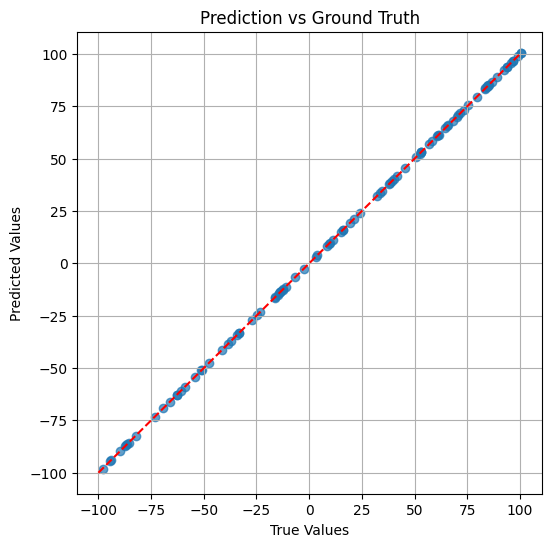

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.plot([-100, 100], [-100, 100], 'r--')  # 정답과 예측이 같을 때 기준선
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Ground Truth")
plt.grid(True)
plt.show()


In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = np.array([
    [1, 2, 0, -4],
    [5, 4, 3, 4],
    [1, 2, -1, -6],
    [3, 1, 0, 3],
    [2, 4, 2, -4],
    [4, 1, 2, 9],
    [-1, 3, 2, -7],
    [4, 3, 3, 5],
    [0, 2, 6, 6],
    [2, 2, 1, 0],
    [1, -2, -2, 4],
    [0, 1, 3, 3],
    [1, 1, 3, 5],
    [0, 1, 4, 5],
    [2, 3, 3, 1],
])

x_train = torch.tensor(data[:, :-1]).float().view(-1, 3)
y_train = torch.tensor(data[:, -1]).float().view(-1, 1)
print(x_train[:3])
print(y_train[:3])

class My_Linear_Regression(nn.Module):

    def __init__(self, input_nodes):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(input_nodes, 1),
        )

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits

model = My_Linear_Regression(3)
print(model)

for name, child in model.named_children():
    for param in child.parameters():
        print(name, param)

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
num_epoch = 2000
loss_data = []

for epoch in range(num_epoch):
    y_pred = model(x_train)
    loss = loss_function(y_pred, y_train)

    loss_data.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item()}")

# 예측 결과 확인
with torch.no_grad():
    y_pred = model(x_train)

print("True:", y_train.squeeze())
print("Pred:", y_pred.squeeze())

tensor([[ 1.,  2.,  0.],
        [ 5.,  4.,  3.],
        [ 1.,  2., -1.]])
tensor([[-4.],
        [ 4.],
        [-6.]])
My_Linear_Regression(
  (linear_stack): Sequential(
    (0): Linear(in_features=3, out_features=1, bias=True)
  )
)
linear_stack Parameter containing:
tensor([[-0.3832, -0.2274,  0.4614]], requires_grad=True)
linear_stack Parameter containing:
tensor([0.3123], requires_grad=True)
Epoch 0 | Loss: 22.446813583374023
Epoch 100 | Loss: 0.15636523067951202
Epoch 200 | Loss: 0.005839359946548939
Epoch 300 | Loss: 0.0016044819494709373
Epoch 400 | Loss: 0.0005392214516177773
Epoch 500 | Loss: 0.00018216369790025055
Epoch 600 | Loss: 6.154771836008877e-05
Epoch 700 | Loss: 2.07949269679375e-05
Epoch 800 | Loss: 7.0275013968057465e-06
Epoch 900 | Loss: 2.3744582904328126e-06
Epoch 1000 | Loss: 8.026949558370688e-07
Epoch 1100 | Loss: 2.7124389134769444e-07
Epoch 1200 | Loss: 9.194154415581579e-08
Epoch 1300 | Loss: 3.1108687181813366e-08
Epoch 1400 | Loss: 1.0561749697046707

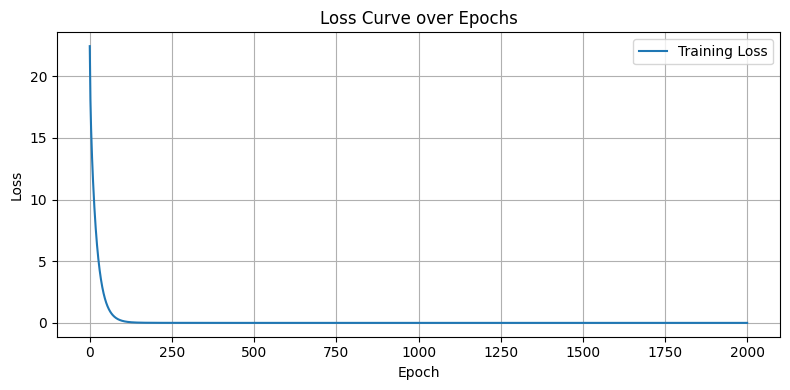

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(loss_data, label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
